Convolusional Neural Network

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


Menyiapkan Direktori

In [ ]:
base_dir = '/content/drive/MyDrive/PTS mp 1 CNN image'
!ls "/content/drive/MyDrive/PTS mp 1 CNN image"

bahan  latih  validasi


In [ ]:
# menentukan direktori

bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')


In [ ]:
#  menentukan direktori isi bahan
rocktes_dir = os.path.join(bahan_dir, 'rocktes/')
carrots_dir = os.path.join(bahan_dir, 'carrots/')

print("Jumlah Data carrots dan rocktes")
print('total rocktes images:', len(os.listdir(rocktes_dir)))
print('total carrots images:', len(os.listdir(carrots_dir)))

Jumlah Data carrots dan rocktes
total rocktes images: 118
total carrots images: 118


In [ ]:
# Direktori isi latih/training
train_carrots = os.path.join(train_dir, 'carrots/')
train_rocktes = os.path.join(train_dir, 'rocktes/')

# direktori isi validasi
validation_carrots = os.path.join(validation_dir, 'carrots/')
validation_rocktes = os.path.join(validation_dir, 'rocktes/')

Menyiapkan Dataset

In [ ]:
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    if not os.path.exists(source):
        print(f"Error: Folder sumber tidak ditemukan -> {source}")
        return
    if not os.path.exists(train):
        os.makedirs(train)  # Buat folder jika belum ada
    if not os.path.exists(val):
        os.makedirs(val)  # Buat folder jika belum ada

    total_files = os.listdir(source)
    total_size = len(total_files)

    if total_size == 0:
        print(f"Error: Folder sumber kosong -> {source}")
        return

    train_size = int(total_size * train_ratio)
    val_size = total_size - train_size

    randomized = random.sample(total_files, total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if os.path.exists(i_file):  # Cek apakah file benar-benar ada
            copyfile(i_file, destination)
        else:
            print(f"File tidak ditemukan: {i_file}")

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if os.path.exists(i_file):
            copyfile(i_file, destination)
        else:
            print(f"File tidak ditemukan: {i_file}")

train_ratio = 0.9

# Cek apakah variabel path sudah didefinisikan sebelumnya
try:
    source_00 = carrots_dir
    train_00 = train_carrots
    val_00 = validation_carrots
    train_val_split(source_00, train_00, val_00, train_ratio)

    source_01 = rocktes_dir
    train_01 = train_rocktes
    val_01 = validation_rocktes
    train_val_split(source_01, train_01, val_01, train_ratio)

except NameError as e:
    print(f"Error: Variabel tidak didefinisikan - {e}")



In [ ]:
print('Jumlah data latih carrots:', len(os.listdir(carrots_dir)))
print('Jumlah data latih carrots:', len(os.listdir(train_carrots)))
print('jumlah val carrots       :', len(os.listdir(validation_carrots)))

Jumlah data latih carrots: 118
Jumlah data latih carrots: 118
jumlah val carrots       : 31


Pre Procesing


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGeneratort

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range=0.2,
                    zoom_range = 0.1
)

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range=0.2,
                    zoom_range = 0.1
                    )

target


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

val_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 236 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi mencapai 99%")
      self.model.stop_training = True
callbacks = myCallback()

Model CNN

In [ ]:
model = tf.keras.models.Sequential ([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed =112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       1,849,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,970,694 (7.52 MB)

 Trainable params: 1,970,694 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'Adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.5192 - loss: 0.8405 - val_accuracy: 0.6875 - val_loss: 0.5841
Epoch 2/25
2/6 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7422 - loss: 0.5433

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/step - accuracy: 0.7370 - loss: 0.5328 - val_accuracy: 0.5938 - val_loss: 0.6240
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7177 - loss: 0.5110 - val_accuracy: 0.7188 - val_loss: 0.5798
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 778ms/step - accuracy: 0.8646 - loss: 0.4427 - val_accuracy: 0.8750 - val_loss: 0.3714
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8529 - loss: 0.4214 - val_accuracy: 0.8125 - val_loss: 0.3988
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 792ms/step - accuracy: 0.8229 - loss: 0.3930 - val_accuracy: 0.7188 - val_loss: 0.5935
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8461 - loss: 0.3729 - val_accuracy: 0.7812 - val_loss: 0.3881
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.8802 - loss: 0.2491 - val_accuracy: 0.8125 - val_loss: 0.3831
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9013 - loss: 0.2447 - val_accuracy: 0.8125 - val_loss: 0.5144
Epoch 10/25

Tingkat akurasi dan loss model

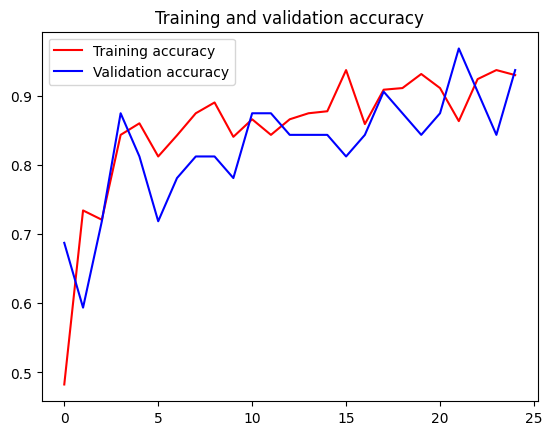

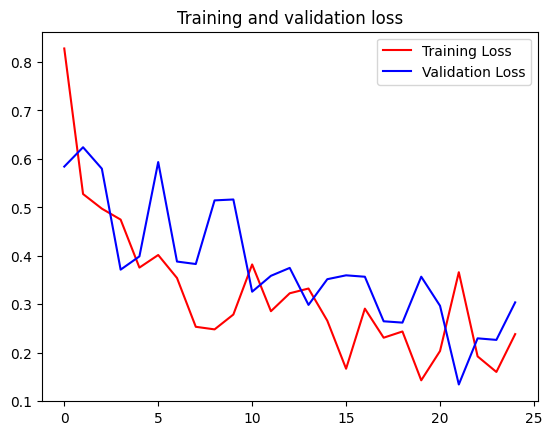

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

Klasifikasi

Saving 4c7fac559597e10f.jpg to 4c7fac559597e10f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4c7fac559597e10f.jpg
This image belongs to class carrots


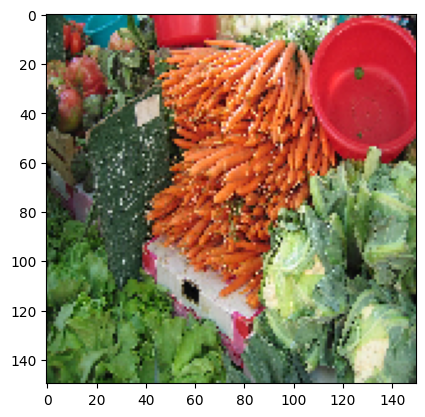

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  class_list = os.listdir(train_dir)

  predicted_class_index = np.argmax(classes[0])
  print('This image belongs to class', class_list[predicted_class_index]) # Use predicted_class_index instead of j